In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the data from “college.csv” that has attributes collected about private and public colleges for a particular year. We will try to predict the private/public status of the college from other attributes.

In [102]:
dat = pd.read_csv("College.csv")

In [103]:
dat.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [104]:
dat.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [105]:
dat["Private"].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Private', ylabel='count'>

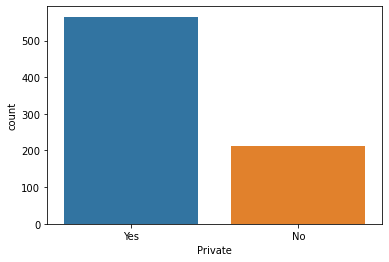

In [106]:
sns.countplot(dat["Private"])

## Dataset is not balanced

In [61]:
from sklearn.preprocessing import LabelEncoder

## 2. Use LabelEncoder to encode the target variable in to numerical form and split the data such that 20% of the data is set aside for testing.

In [107]:
leModel = LabelEncoder()

In [108]:
dat["Private_le_encoded"] = leModel.fit_transform(dat["Private"])

In [109]:
dat.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_le_encoded
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [110]:
X = dat.drop(["Private", "Private_le_encoded"], axis=1)

In [111]:
y = dat["Private_le_encoded"]

In [112]:
y

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private_le_encoded, Length: 777, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(621, 17) (156, 17) (621,) (156,)


In [17]:
y_train.value_counts()

1    450
0    171
Name: Private_le_encoded, dtype: int64

## 3. Fit a linear svm from scikit learn and observe the accuracy.
[Hint: Use Linear SVC]

In [18]:
from sklearn.svm import SVC

In [23]:
model = SVC(kernel='linear')

In [29]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
y_predicted =model.predict(X_test)

In [34]:
model.score(X_test, y_test)

0.9358974358974359

In [32]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.96      0.96      0.96       115

    accuracy                           0.94       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.94      0.94      0.94       156



## 4. Preprocess the data using StandardScalar and fit the same model again and observe the change in accuracy.
[Hint: Refer to scikitlearn’s preprocessing methods]

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
StdScalarModel = StandardScaler()

In [115]:
X_scaled = StdScalarModel.fit_transform(X)

In [116]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


In [117]:
y

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private_le_encoded, Length: 777, dtype: int32

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )
y_train.value_counts()

(621, 17) (156, 17) (621,) (156,)


1    450
0    171
Name: Private_le_encoded, dtype: int64

In [166]:
from sklearn.svm import SVC
model = SVC(C = 1.0, degree = 0, kernel='linear')

In [167]:
model.fit(X_train, y_train)

SVC(degree=0, kernel='linear')

In [168]:
y_predicted =model.predict(X_test)
model.score(X_test, y_test)

0.9294871794871795

In [144]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.94      0.95      0.94       115

    accuracy                           0.92       156
   macro avg       0.89      0.89      0.89       156
weighted avg       0.92      0.92      0.92       156



## Accuracy did not improve after scaling the data, but performance(training speed) improved a lot

## 5. Use scikit learn’s gridsearch to select the best hyperparameter for a non-linear SVM, identify the model with best score and its parameters.
[Hint: Refer to model_selection module of Scikit learn]

In [151]:
from sklearn.model_selection import GridSearchCV

In [173]:
grid_obj = GridSearchCV(estimator= SVC(), param_grid={
    'C': [1.0, 5.0, 3.0],
    'degree' : [0, 1 , 2],
    'kernel' : ["linear", "rbf"] }, cv = 10 )

In [174]:
grid_obj.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 5.0, 3.0], 'degree': [0, 1, 2],
                         'kernel': ['linear', 'rbf']})

In [175]:
pd.DataFrame(grid_obj.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008658,0.004823,0.003161,0.004290,1.0,0,linear,"{'C': 1.0, 'degree': 0, 'kernel': 'linear'}",0.952381,0.951613,...,0.983871,0.935484,0.935484,0.854839,0.967742,0.935484,0.983871,0.945238,0.034758,1
1,0.007813,0.007813,0.003125,0.006250,1.0,0,rbf,"{'C': 1.0, 'degree': 0, 'kernel': 'rbf'}",0.968254,0.935484,...,0.983871,0.935484,0.951613,0.822581,0.967742,0.919355,0.983871,0.938761,0.044964,16
2,0.007812,0.007812,0.001562,0.004687,1.0,1,linear,"{'C': 1.0, 'degree': 1, 'kernel': 'linear'}",0.952381,0.951613,...,0.983871,0.935484,0.935484,0.854839,0.967742,0.935484,0.983871,0.945238,0.034758,1
3,0.009375,0.007654,0.003125,0.006250,1.0,1,rbf,"{'C': 1.0, 'degree': 1, 'kernel': 'rbf'}",0.968254,0.935484,...,0.983871,0.935484,0.951613,0.822581,0.967742,0.919355,0.983871,0.938761,0.044964,16
4,0.011019,0.004557,0.001899,0.001374,1.0,2,linear,"{'C': 1.0, 'degree': 2, 'kernel': 'linear'}",0.952381,0.951613,...,0.983871,0.935484,0.935484,0.854839,0.967742,0.935484,0.983871,0.945238,0.034758,1
5,0.008418,0.007408,0.003125,0.006250,1.0,2,rbf,"{'C': 1.0, 'degree': 2, 'kernel': 'rbf'}",0.968254,0.935484,...,0.983871,0.935484,0.951613,0.822581,0.967742,0.919355,0.983871,0.938761,0.044964,16
6,0.018859,0.006472,0.001562,0.004686,5.0,0,linear,"{'C': 5.0, 'degree': 0, 'kernel': 'linear'}",0.952381,0.935484,...,0.983871,0.951613,0.935484,0.854839,0.967742,0.935484,0.983871,0.945238,0.034758,1
7,0.009326,0.006852,0.002562,0.004610,5.0,0,rbf,"{'C': 5.0, 'degree': 0, 'kernel': 'rbf'}",0.968254,0.983871,...,0.983871,0.919355,0.951613,0.854839,0.967742,0.919355,0.983871,0.945212,0.039669,10
8,0.018366,0.008487,0.002963,0.004455,5.0,1,linear,"{'C': 5.0, 'degree': 1, 'kernel': 'linear'}",0.952381,0.935484,...,0.983871,0.951613,0.935484,0.854839,0.967742,0.935484,0.983871,0.945238,0.034758,1
9,0.006250,0.007655,0.004688,0.007160,5.0,1,rbf,"{'C': 5.0, 'degree': 1, 'kernel': 'rbf'}",0.968254,0.983871,...,0.983871,0.919355,0.951613,0.854839,0.967742,0.919355,0.983871,0.945212,0.039669,10


In [176]:
grid_obj.score(X_scaled, y)

0.9510939510939511

In [177]:
print(grid_obj.best_estimator_) 

SVC(degree=0, kernel='linear')
